### Week 9: Construct AlexNet on MNIST dataset compute the performance evaluation matrices.

In [100]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

from numpy import argmax
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from seaborn import heatmap
from matplotlib import pyplot as plt

In [98]:
# preprocessing of data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  =  X_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [94]:
# loading model
def create_model():
    model = Sequential([
        Conv2D(32, kernel_size = (5, 5), activation = 'relu', input_shape = (28, 28, 1)),
        MaxPooling2D(pool_size = (2, 2)),
        
        Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPooling2D(pool_size = (2, 2)),
                     
        Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        Conv2D(128, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
        MaxPooling2D(pool_size = (2, 2)),
        
        Flatten(),
        
        Dense(64, activation = 'relu'),
        Dropout(0.4),
        
        Dense(32, activation = 'relu'),
        Dropout(0.2),
        
        Dense(10, activation = 'softmax'),
    ])
    
    model.compile(
        optimizer = 'adam', 
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [77]:
model = create_model()
model.fit(
    X_train, 
    y_train,
    epochs = 3,
    batch_size = 6,
    verbose = 2,
    validation_split = 0.3
)

Epoch 1/3
7000/7000 - 42s - loss: 0.3700 - accuracy: 0.8812 - val_loss: 0.0602 - val_accuracy: 0.9838 - 42s/epoch - 6ms/step
Epoch 2/3
7000/7000 - 40s - loss: 0.1363 - accuracy: 0.9634 - val_loss: 0.0462 - val_accuracy: 0.9876 - 40s/epoch - 6ms/step
Epoch 3/3
7000/7000 - 40s - loss: 0.0940 - accuracy: 0.9743 - val_loss: 0.0519 - val_accuracy: 0.9880 - 40s/epoch - 6ms/step


In [114]:
y_pred   = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


Accuracy Score : 98.92
Precision Score : 98.92
Recall Score : 98.92
F1 Score : 98.92


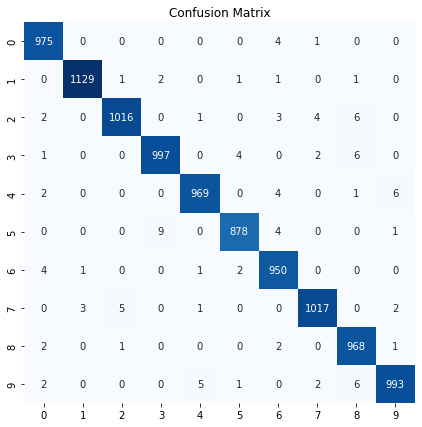

In [115]:
y_actual = [argmax(i) for i in y_test]
y_pred   = [argmax(i) for i in y_pred]

print("Accuracy Score :", accuracy_score(y_pred, y_actual) * 100)
print("Precision Score :", precision_score(y_actual, y_pred, average='micro') * 100)
print("Recall Score :", recall_score(y_actual, y_pred, average='micro') * 100)
print("F1 Score :", f1_score(y_actual, y_pred, average='micro') * 100)

_, ax = plt.subplots(figsize = (7, 7))
ax.set_title("Confusion Matrix")
heatmap(confusion_matrix(y_actual, y_pred), annot = True,cbar=False, fmt='1d', cmap='Blues', ax = ax)
plt.show()